In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
currency_pair = 'EURUSD=X'
data = yf.download(currency_pair, start="2022-01-01", end="2024-01-01", interval='1d')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,1.137346,0
2022-01-04,1.130199,1.132300,1.127345,1.130224,1.130224,0
2022-01-05,1.128541,1.134559,1.127764,1.128363,1.128363,0
2022-01-06,1.131222,1.133067,1.128554,1.131350,1.131350,0
2022-01-07,1.129586,1.135976,1.129050,1.129688,1.129688,0


In [ ]:
data = data[['Close']]

data.dropna(inplace=True)

data.columns = ['EURUSD_Close']

data.head()


<ipython-input-4-12c780d7f7e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,EURUSD_Close
Date,
2022-01-03,1.137346
2022-01-04,1.130224
2022-01-05,1.128363
2022-01-06,1.131350
2022-01-07,1.129688


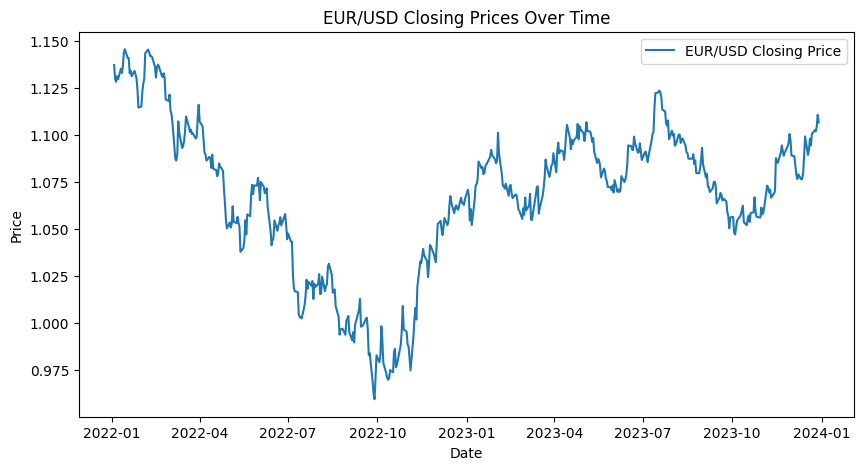

In [ ]:
# Plot the closing prices over time
plt.figure(figsize=(10,5))
plt.plot(data['EURUSD_Close'], label='EUR/USD Closing Price')
plt.title('EUR/USD Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-6-b4268743ef1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['EURUSD_Close'].pct_change()


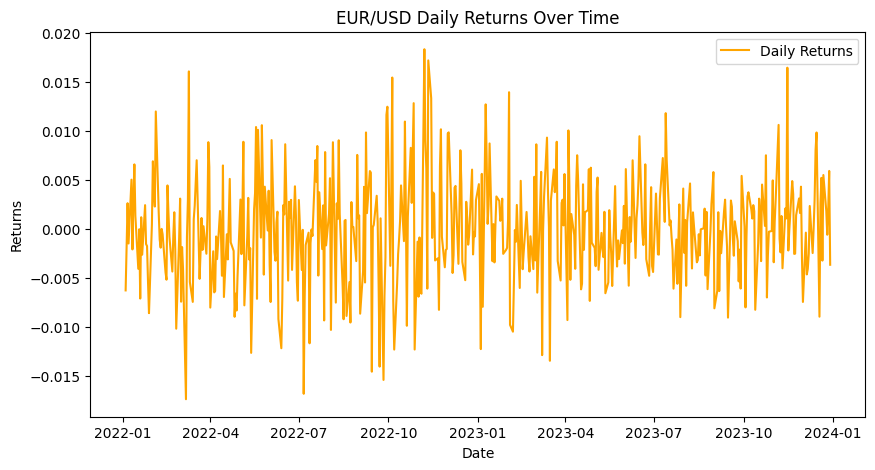

In [ ]:
# Calculate daily returns
data['Returns'] = data['EURUSD_Close'].pct_change()

# Visualize the daily returns
plt.figure(figsize=(10,5))
plt.plot(data['Returns'], label='Daily Returns', color='orange')
plt.title('EUR/USD Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [ ]:
data['SMA20'] = data['EURUSD_Close'].rolling(window=20).mean()
data['SMA50'] = data['EURUSD_Close'].rolling(window=50).mean()

data.dropna(inplace=True)

data.head()


<ipython-input-7-4c8930f7db9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['EURUSD_Close'].rolling(window=20).mean()
<ipython-input-7-4c8930f7db9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA50'] = data['EURUSD_Close'].rolling(window=50).mean()
<ipython-input-7-4c8930f7db9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,EURUSD_Close,Returns,SMA20,SMA50
Date,,,,
2022-03-11,1.101394,-0.005408,1.118285,1.127787
2022-03-14,1.093207,-0.007434,1.116121,1.126904
2022-03-15,1.094319,0.001018,1.114305,1.126186
2022-03-16,1.096936,0.002391,1.112368,1.125557
2022-03-17,1.102196,0.004794,1.110601,1.124974


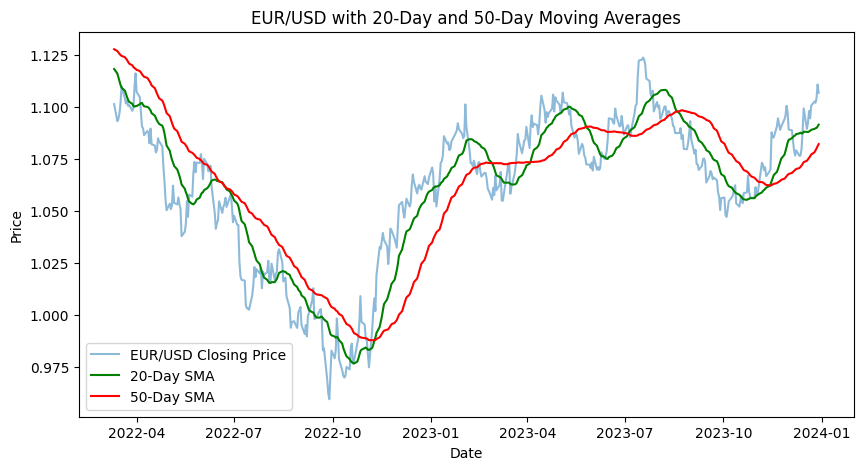

In [ ]:
# Plot closing prices along with the moving averages
plt.figure(figsize=(10,5))
plt.plot(data['EURUSD_Close'], label='EUR/USD Closing Price', alpha=0.5)
plt.plot(data['SMA20'], label='20-Day SMA', color='green')
plt.plot(data['SMA50'], label='50-Day SMA', color='red')
plt.title('EUR/USD with 20-Day and 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)

data['Position'] = data['Signal'].diff()

data.head()


<ipython-input-9-67a778d3ca51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = 0
<ipython-input-9-67a778d3ca51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
<ipython-input-9-67a778d3ca51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,EURUSD_Close,Returns,SMA20,SMA50,Signal,Position
Date,,,,,,
2022-03-11,1.101394,-0.005408,1.118285,1.127787,0,NaN
2022-03-14,1.093207,-0.007434,1.116121,1.126904,0,0.0
2022-03-15,1.094319,0.001018,1.114305,1.126186,0,0.0
2022-03-16,1.096936,0.002391,1.112368,1.125557,0,0.0
2022-03-17,1.102196,0.004794,1.110601,1.124974,0,0.0


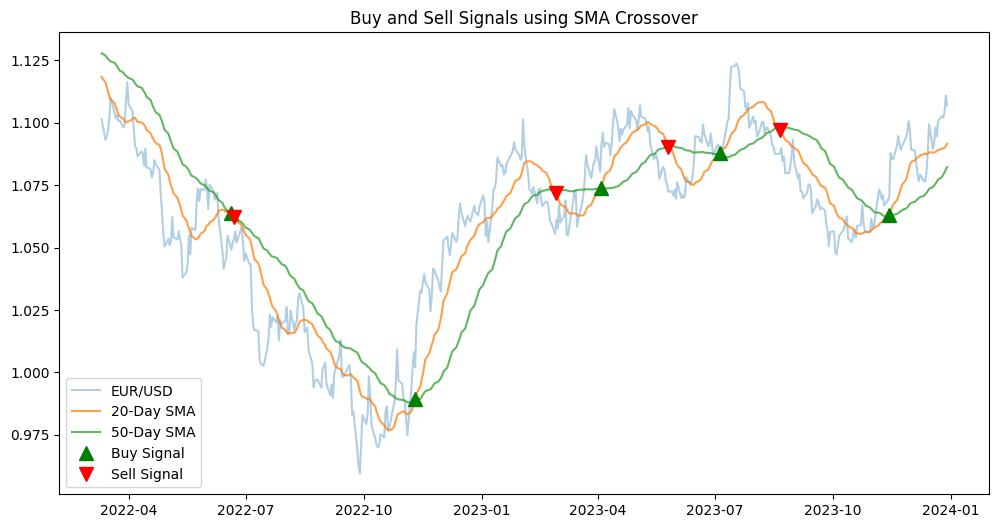

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['EURUSD_Close'], label='EUR/USD', alpha=0.35)
plt.plot(data['SMA20'], label='20-Day SMA', alpha=0.75)
plt.plot(data['SMA50'], label='50-Day SMA', alpha=0.75)

plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Buy and Sell Signals using SMA Crossover')
plt.legend()
plt.show()


<ipython-input-11-8bb55af37a92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Hold_Returns'] = data['EURUSD_Close'].pct_change()
<ipython-input-11-8bb55af37a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns'] = data['Buy_Hold_Returns'] * data['Signal'].shift(1)
<ipython-input-11-8bb55af37a92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

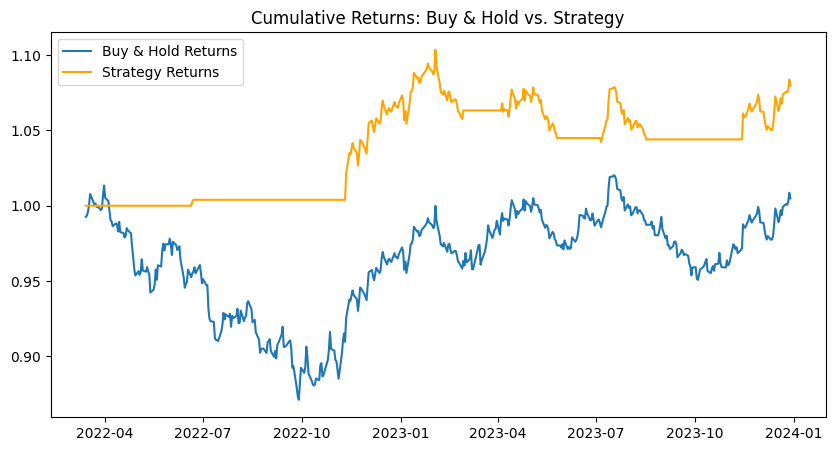

In [ ]:
data['Buy_Hold_Returns'] = data['EURUSD_Close'].pct_change()

data['Strategy_Returns'] = data['Buy_Hold_Returns'] * data['Signal'].shift(1)

data['Cumulative_Buy_Hold'] = (1 + data['Buy_Hold_Returns']).cumprod()
data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()

plt.figure(figsize=(10,5))
plt.plot(data['Cumulative_Buy_Hold'], label='Buy & Hold Returns')
plt.plot(data['Cumulative_Strategy'], label='Strategy Returns', color='orange')
plt.title('Cumulative Returns: Buy & Hold vs. Strategy')
plt.legend()
plt.show()

<ipython-input-12-5a9024761982>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = calculate_RSI(data, 'EURUSD_Close')


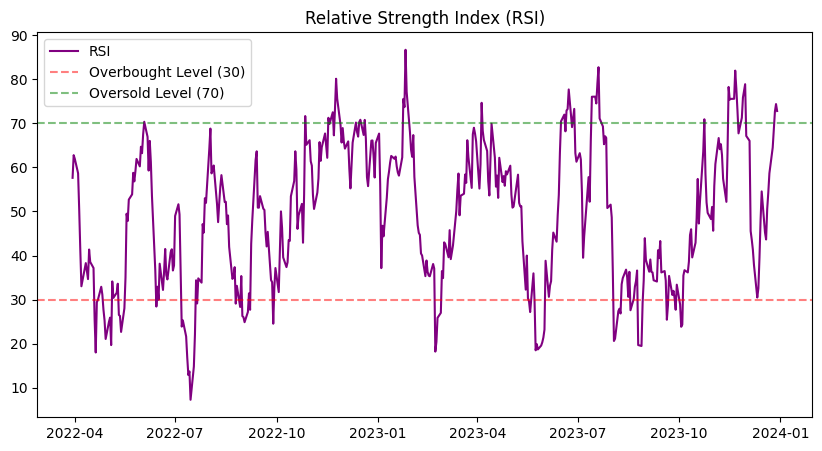

In [ ]:
# Function to calculate the RSI
def calculate_RSI(data,tag, window=14):
    delta = data[tag].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))

    return RSI

# Add RSI to the dataframe
data['RSI'] = calculate_RSI(data, 'EURUSD_Close')

# Plot RSI
plt.figure(figsize=(10,5))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(30, linestyle='--', alpha=0.5, color='red', label='Overbought Level (30)')
plt.axhline(70, linestyle='--', alpha=0.5, color='green', label='Oversold Level (70)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

<ipython-input-13-df9cc6d32c0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMA12'] = data['EURUSD_Close'].ewm(span=12, adjust=False).mean()
<ipython-input-13-df9cc6d32c0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMA26'] = data['EURUSD_Close'].ewm(span=26, adjust=False).mean()
<ipython-input-13-df9cc6d32c0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

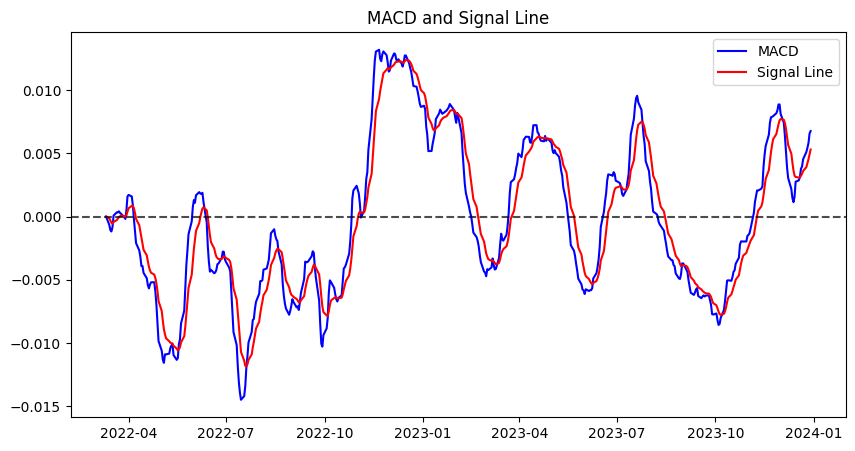

In [ ]:
# Calculate MACD and signal line
data['EMA12'] = data['EURUSD_Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['EURUSD_Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(10,5))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='red')
plt.axhline(0, linestyle='--', alpha=0.7, color='black')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


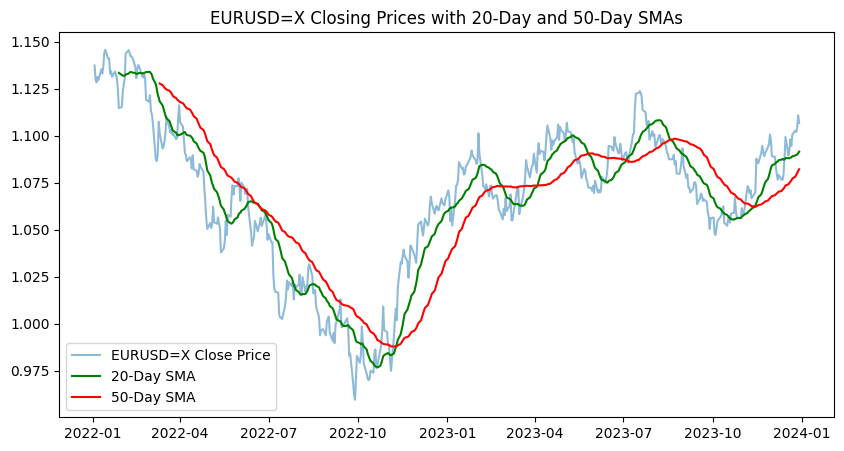

[*********************100%***********************]  1 of 1 completed


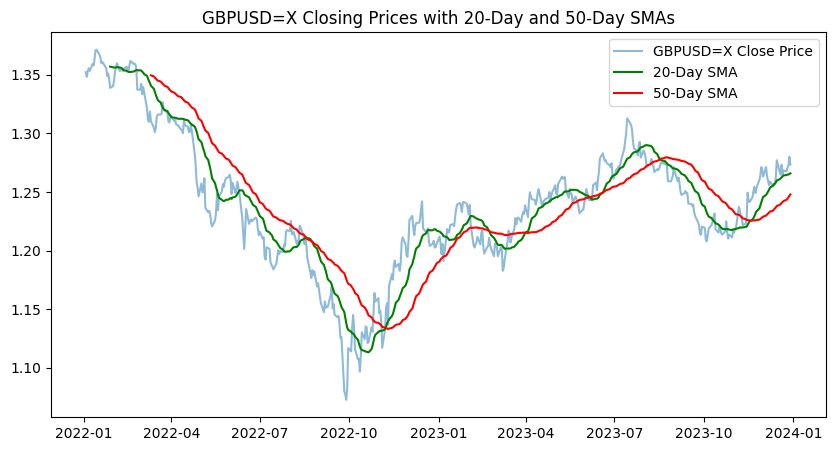

[*********************100%***********************]  1 of 1 completed


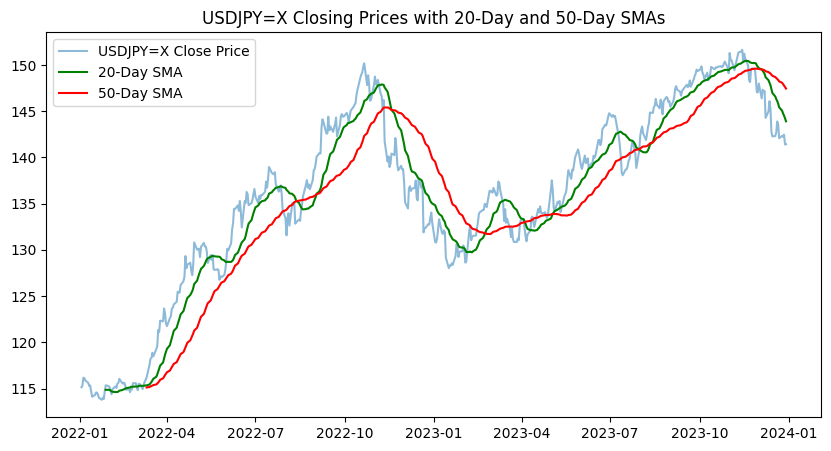

In [ ]:
def evaluate_currency_pair(pair, start, end):
    data = yf.download(pair, start=start, end=end, interval='1d')

    data = data[['Close']].dropna()
    data.columns = [f'{pair}_Close']

    data['SMA20'] = data[f'{pair}_Close'].rolling(window=20).mean()
    data['SMA50'] = data[f'{pair}_Close'].rolling(window=50).mean()


    data['EMA12'] = data[f'{pair}_Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data[f'{pair}_Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['RSI'] = calculate_RSI(data, f'{pair}_Close',window=14)

    plt.figure(figsize=(10,5))
    plt.plot(data[f'{pair}_Close'], label=f'{pair} Close Price', alpha=0.5)
    plt.plot(data['SMA20'], label='20-Day SMA', color='green')
    plt.plot(data['SMA50'], label='50-Day SMA', color='red')
    plt.title(f'{pair} Closing Prices with 20-Day and 50-Day SMAs')
    plt.legend()
    plt.show()

    return data

pairs = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X']
for pair in pairs:
    evaluate_currency_pair(pair, start="2022-01-01", end="2024-01-01")

In [ ]:
def optimize_moving_averages(data, short_window_range, long_window_range):
    best_short_window = None
    best_long_window = None
    best_return = -np.inf

    for short_window in short_window_range:
        for long_window in long_window_range:
            if short_window < long_window:
                data['SMA_short'] = data['EURUSD_Close'].rolling(window=short_window).mean()
                data['SMA_long'] = data['EURUSD_Close'].rolling(window=long_window).mean()

                data['Signal'] = 0
                data['Signal'] = np.where(data['SMA_short'] > data['SMA_long'], 1, 0)
                data['Position'] = data['Signal'].diff()

                data['Buy_Hold_Returns'] = data['EURUSD_Close'].pct_change()
                data['Strategy_Returns'] = data['Buy_Hold_Returns'] * data['Signal'].shift(1)

                cumulative_return = (1 + data['Strategy_Returns']).cumprod().iloc[-1]

                if cumulative_return > best_return:
                    best_return = cumulative_return
                    best_short_window = short_window
                    best_long_window = long_window

    return best_short_window, best_long_window, best_return

short_window_range = range(5, 30, 5)
long_window_range = range(30, 100, 10)
best_short, best_long, best_return = optimize_moving_averages(data, short_window_range, long_window_range)

print(f'Best Short Window: {best_short}')
print(f'Best Long Window: {best_long}')
print(f'Best Strategy Return: {best_return:.2f}')

Best Short Window: 15
Best Long Window: 40
Best Strategy Return: 1.11


In [ ]:
data['Target'] = np.where(data['EURUSD_Close'].shift(-1) > data['EURUSD_Close'], 1, 0)

data.dropna(inplace=True)

features = ['SMA20', 'SMA50', 'RSI', 'MACD', 'Signal_Line']

data[features + ['Target']].head()


,SMA20,SMA50,RSI,MACD,Signal_Line,Target
Date,,,,,,
2022-07-14,1.037656,1.050681,13.687681,-0.013920,-0.009750,0
2022-07-15,1.035050,1.049653,7.252056,-0.014481,-0.010696,1
2022-07-18,1.033075,1.048781,14.786574,-0.014192,-0.011395,1
2022-07-19,1.031197,1.047940,22.161001,-0.013414,-0.011799,1
2022-07-20,1.029690,1.047336,34.373356,-0.011964,-0.011832,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((305, 5), (77, 5))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        28
           1       0.77      0.61      0.68        49

    accuracy                           0.64        77
   macro avg       0.63      0.65      0.63        77
weighted avg       0.67      0.64      0.64        77

Confusion Matrix:
[[19  9]
 [19 30]]


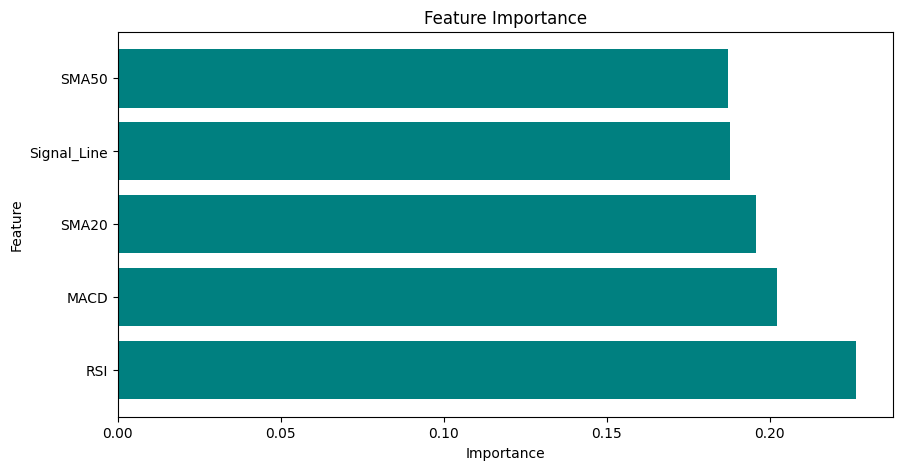

In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
last_5_predictions = rf_model.predict(X.tail(5))
data['Predicted_Signal'] = np.nan
data['Predicted_Signal'].iloc[-5:] = last_5_predictions

data[['EURUSD_Close', 'SMA20', 'SMA50', 'RSI', 'MACD', 'Predicted_Signal']].tail(5)


<ipython-input-20-a1c56b85d3dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Signal'].iloc[-5:] = last_5_predictions


,EURUSD_Close,SMA20,SMA50,RSI,MACD,Predicted_Signal
Date,,,,,,
2023-12-25,1.102657,1.089489,1.078230,64.501126,0.005101,0.0
2023-12-26,1.102026,1.089799,1.079162,68.474990,0.005432,1.0
2023-12-27,1.104301,1.089984,1.080102,72.684034,0.005812,1.0
2023-12-28,1.110864,1.090659,1.081242,74.374746,0.006566,0.0
2023-12-29,1.106819,1.091539,1.082206,72.796301,0.006760,0.0
